# MTHM503/J - Applications of Data Science and Statistics

(c) University of Exeter, May 2021

Lecturer: Dr Stefan Siegert [s.siegert@exeter.ac.uk](mailto:s.siegert@exeter.ac.uk)

# Week 2 Topic 2: Dimensionality reduction by Principal Component analysis

# Dimensionality reduction

Dimensionality reduction is the process of reducing large data sets (many numbers) to smaller data sets (fewer numbers), while retaining as much information as possible of the original data set.

In statistics and machine learning dimensionality reduction is useful to speed up algorithms, improve accuracy of statistical predictions, reduce storage space required, help interpreting results, avoid redundancy and reduce noise.

## Linear methods

Assume data is stored in a vector $\mathbf{x} = (x_1, x_2, ..., x_p)'$ where $p$ is a large number. A linear transformation of $\mathbf{x}$ is realised by a matrix multiplication $A\mathbf{x}$ where $A$ is a matrix with $p$ columns and $k$ rows. If $k < p$ then the result of the transformation $A\mathbf{x}$ is a new vector of length less than the original.

The most extreme case of linear dimensionality reduction is when the matrix $A$ only has a single row, $A = (a_1, a_2, \dots, a_p)$. The the linear transformation is simply a *weighted sum* of the elements of $\mathbf{x}$

$$y = A\mathbf{x} = \sum_{i=1}^p a_i x_i$$

One special case of linearly reducing the dimensionality of the vector $\mathbf{x}$ is to take the average of its elements, which corresponds to the choice $a_i = 1/p$ for $i=1,...,p$.

If the linear transformation matrix $A$ has more than $k$ rows, that is

$$A = \left(\begin{matrix}A_{11} & \dots & A_{1p}\\ \vdots & & \vdots\\ A_{k1} & \dots & A_{kp}\end{matrix}\right)$$

then the resulting vector $\mathbf{y} = A\mathbf{x}$ has length $k$ and if $k < p$ the dimensionality has been reduced from $p$ to $k$.

Examples of linear methods for dimensionality reduction include:

- PCA (principal component analysis): We will cover this method in detail below
- Factor analysis
- Linear discriminant analysis
- Singular value decomposition

# Nonlinear methods

There are many methods of reducing the dimensionality of a vector $\mathbf{x}$ in other ways than multiplying it by a matrix. A general form of writing dimensionality reduction is to formulate it as application of a mathematical function, say $\phi(\mathbf{x})$ maps from vectors of length $k$ to a new vector of length $k < p$

$$\mathbf{y} = \phi(\mathbf{x})$$

Nonlinear dimensionality reduction methods include

- multidimensional scaling (MDS)
- locally linear embedding (LLE)
- isometric feature mapping (Isomap)
- Auto-encoders

and many more. A good popular introduction to these methods is [this blogpost on towardsdatascience.com](https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e). The freely available online textbook [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) contains detailed mathematical descriptions of many linear and nonlinear dimensionality reduction methods.

# Principal component analysis

Principal component analysis is a dimensionality reduction method to transform a vector $\mathbf{x}$ of length $p$ to a new vector $\mathbf{y}$ with fewer elements through a linear transformation, that is

$$\mathbf{y} = A \mathbf{x}$$

The criterion of selecting the linear transformation matrix $A$ is that the elements of $\mathbf{y}$ are *uncorrelated and have maximum possible variance*. It turns out that these two criteria are enough to uniquely determine the matrix $A$.

To make these criteria more concrete consider the example where a data set contains $n$ vectors $\mathbf{x}_1, \dots, \mathbf{x}_n$, where each vector is of length $p$.

Assume we choose $A$ to have only one row, that is, the transformation is from vectors of length $p$ to scalars (vectors of length 1). The vectors $\mathbf{x}_1, \dots, \mathbf{x}_n$ are transformed to new variables $y_1, \dots, y_n$. In PCA, the elements of the transformation $A$ are chosen such that the variance

$$var(y) = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2$$

is maximised ($\bar{y}$ is the sample mean).

How should we calculate the elements of $A$ such that the variance of $y$ is maximised? It turns out, and we will assert this here without proof, that $A$ should be chosen as the *leading eigenvector* of the sample covariance matrix of $\mathbf{x}_1, \dots, \mathbf{x}_n$. That is, define the $p\times p$ matrix $S$ with elements

$$S_{u,v} = \frac{1}{n} \sum_{i=1}^n (x_{i,u} - \bar{x}_u)(x_{i,v} - \bar{x}_v)$$

where $\bar{x}_u = \frac{1}{n}\sum_{i=1}^n x_{i,u}$ is the sample mean of the $u$-th elements of the vectors $\mathbf{x}_1, \dots, \mathbf{x}_n$.


If we want to use PCA to reduce the dimensionality of $\mathbf{x}$ from $p$ to, say, 2, we have to choose the 2 rows of the matrix $A$ as the 2 leading eigenvectors of the sample covariance matrix $S$.

In general, to reduce dimensionality from $p$ to $k<p$ with PCA, we have to use the $k$ leading eigenvectors of the sample covariance matrix.

# Handwritten digits recognition

The python package scikit-learn contains a data set of handwritten digits that were transformed to 8 by 8 matrices, where each element of the matrix corresponds to a pixel on a 8 by 8 grid and the value of the element indicates a grayscale value.
To use the data we have to import the `load_digits` function. We will also import numpy and matplotlib to process and visualise the digits data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

## Exploratory data analysis

`digits` is a dictionary whose elements contain various parts of the data set:

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Let us explore the elements `data`, `images` and `target`.

In [4]:
digits.images.shape

(1797, 8, 8)

`digits.images` is a 3 dimensional array. The first dimension (1797) corresponds to the sample vectors (the individual digits), each of which is saves as an $8\times 8$ matrix. So lets use `plt.imshow` to plot the first image in the data set:

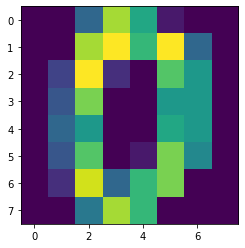

In [5]:
plt.imshow(digits.images[0,:,:])
plt.show()

Looks like a zero, doesn't it? The truth (the actual number encoded in the image) is saved in the `target` element of `digits`.

In [6]:
digits.target[0]

0

Let's try another one:

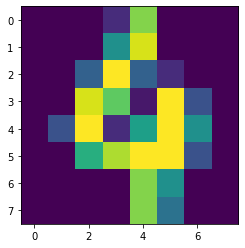

In [7]:
plt.imshow(digits.images[100,:,:])
plt.show()

In [8]:
digits.target[100]

4

This is a four.

The `data` object of `digits` holds the same data as the `images` object, only represented as a vector of length 64 instead of an 8 by 8 matrix:

In [9]:
digits.images[1,:,:]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [10]:
digits.data[1,:]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Using the terminology from previous sections, we have 1797 vectors $\mathbf{x}_1, \dots, \mathbf{x}_{1797}$ where each vector has dimension $p=64$.

## PCA of handwritten digits

Let's apply PCA to the digits data and see what we can learn from it.

To apply PCA, we will have to load the `decompositions` module of scikit learn.

In [11]:
from sklearn import decomposition


Now we can apply PCA by calling `decomposition.PCA`. Let's start with dimensionality reduction to only $k=1$ dimensions. As we did with linear regression, we first initialise a PCA object (specifying the number of reduced dimensions) and then fit it to data:

In [12]:
pca = decomposition.PCA(n_components = 1)
digits_pca_1 = pca.fit(digits.data)

Let's explore the result. The elements of the transformation is saved in the `components_` object:

In [13]:
digits_pca_1.components_

array([[-7.23303509e-18, -1.73094521e-02, -2.23428824e-01,
        -1.35913429e-01, -3.30320859e-02, -9.66339884e-02,
        -8.32959717e-03,  2.26894969e-03, -3.20514695e-04,
        -1.19308724e-01, -2.44451597e-01,  1.48512519e-01,
        -4.67317629e-02, -2.17740646e-01, -1.48139034e-02,
         4.47775444e-03, -4.94130832e-05, -7.95416786e-02,
         8.33951294e-02,  2.15914965e-01, -1.72126551e-01,
        -1.63712175e-01,  2.86442212e-02,  4.23250472e-03,
         9.85490027e-05,  6.42321382e-02,  2.54093403e-01,
        -3.56774908e-02, -2.09462540e-01, -4.31314391e-02,
         5.13116977e-02,  2.13421957e-04,  0.00000000e+00,
         1.59951065e-01,  3.68690917e-01,  1.64406838e-01,
         8.52010541e-02,  3.72983121e-02,  2.15866552e-02,
         0.00000000e+00,  1.28865687e-03,  1.06945409e-01,
         3.03067558e-01,  2.47813118e-01,  2.09637420e-01,
         1.22327534e-02, -3.69458870e-02,  1.61484100e-03,
         6.93022807e-04, -8.35145038e-03, -5.58600071e-0

The objects `explained_variance_` and `explained_variance_ratio_` show how much of the variance of the original data is explained by the transformed variable:

In [14]:
digits_pca_1.explained_variance_ratio_

array([0.14890594])

To actually transform our data, we have to call the `transform` method

In [15]:
y_1 = digits_pca_1.transform(digits.data)
y_1

array([[-1.25946899],
       [ 7.9576132 ],
       [ 6.99192298],
       ...,
       [10.80128097],
       [-4.87210278],
       [-0.34439537]])

Let's see how well the transformed numbers separate the different digits. We do this by combining the `y` variables with the `target` variable, and construct box plots of `y` after grouping with respect to `target`.

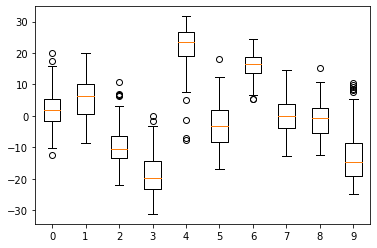

In [16]:
# transform y_1 to a vector of length n
y_1 = y_1.reshape(-1)

# create a list of arrays, the first array corresponding the y values where target is zero, 
# the second array where target is one, etc
y_grouped = []
for ii in range(10):
    y_grouped.append(y_1[digits.target == ii])

# create a grouped boxplot
plt.boxplot(y_grouped, labels=list(range(10)))
plt.show()

What can we learn from the distribution of $y$ in the different digit groups:

- there are big differences in the distributions of $y$ for the different images
- PCA weighted sum of a hand written 0,1,5,7,8 produces similarly distributed $y$ values (roughly between -10 and 10, centered on 0)
- likewise 2, 3 and 9 produce similarly distributed values, an 4 and 6
- if $y$ is below 0 we can be virtually sure that the image doesn't show a 4, and if $y$ is above zero it's almost surely not a 3

By dimensionality reduction through PCA we learn something about similarities and differences between handwritten images. Also, the differences between the distributions would surely be useful for automated recognition of handwritten digits from their image data.

## 2-dimensional PCA

Let's now use PCA to reduce the 64 dimensional data to 2 dimensions.

In [17]:
pca = decomposition.PCA(n_components = 2)
digits_pca_2 = pca.fit(digits.data)
y_2 = digits_pca_2.transform(digits.data)

In [18]:
y_2

array([[ -1.25946647,  21.27488281],
       [  7.95761147, -20.76869928],
       [  6.99192289,  -9.95598551],
       ...,
       [ 10.80128364,  -6.96025262],
       [ -4.8721    ,  12.42395462],
       [ -0.34438982,   6.36554936]])

Now each image has been transformed into a pair of 2 numbers, which we can visualise as points in the 2-d plane. Let's put these points on a scatter plot and color them by the number that they represent.

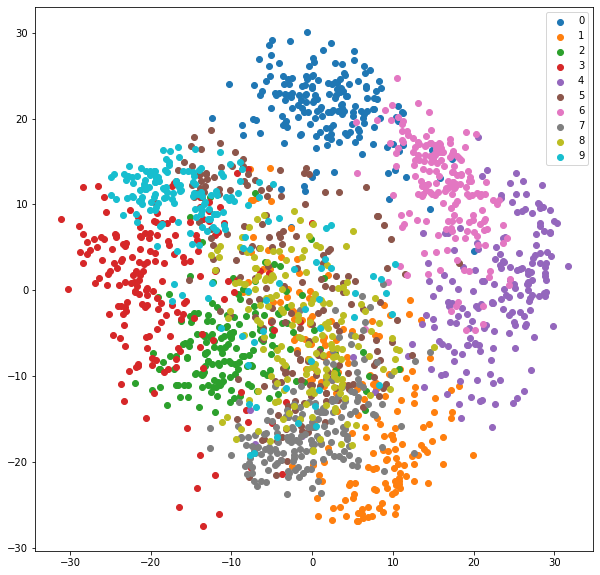

In [19]:
plt.figure(figsize=[10,10])
for ii in range(10):
    plt.scatter(y_2[digits.target == ii, 0], 
                y_2[digits.target == ii, 1], 
                label=ii)
plt.legend()
plt.show()
    

The 2-dimensional PCA has further separated the different digits into separate clusters. That is images that show the same number are more similar to each other than to images that show a different number. Especially zeroes seem to be very well separated from the other numbers in this 2-d representation. Fours and sixes form a cluster that is separated from the other numbers. Threes, nines and fives overlap but, as a cluster, are separated from the other numbers.

In general, we can expect that a machine learning algorithm that uses the 2-d PCA transformations might do better at predicting the true label than based on the 1-d PCA transformation.

## Training a machine learning model to recognise handwritten digits

Predicting a label (the digit) based on continuous data is a classification problem. One of the simplest classification algorithms is logistic regression.

Logistic regression takes in a number of covariates and outputs a probability. While linear regression outputs a value between minus and plus infinity, logistic regression outputs a value between 0 and 1, and can thus be used to assign probabilities to class labels.

Logistic regression models are trained on target $y_1, \dots, y_n$ each of which is either 0 or 1. The inputs to a logistic regression model are as for linear regression, i.e. a design matrix $X$ with $n$ rows and number of columns equal to the number of predictors. Mathematically, the linear superposition of the elements in the $i$-th row of the design matrix $X$ is equated to the *log-odds ratio* of the probability $p_i$ that $y_i$ is equal to one

$$\log\frac{p_i}{1-p_i} = \beta_0 + \beta_1 X_{i,1} + \dots + \beta_p X_{i,p}$$

or equivalently, after defining the $i$-th linear response as $\eta_i = \beta_0 + \beta_1 X_{i,1} + \dots + X_{i,p}$ we have

$$P(y_i = 1) = p_i = \frac{e^{\eta_i}}{1 + e^{\eta_i}}$$

There is no simple analytic solution for the model coefficients $\beta_0, \dots, \beta_p$ and numerical techniques have to be used to estimate them.

Scikit-learn has a logistic regression module to train and predict class labels (like the number shown in an image) based on covariates (such as the first couple of principal components of the pixel maps of the hand-written images). The standard `predict` function of the logistic regression method returns the class label with the highest probability.

In [20]:
# import and initialise logistic regression, need to increase 
# max_iter to ensure convergence
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
# initialise, fit, and transform digit images with PCA (2 components)
pca = decomposition.PCA(n_components = 2)
digits_pca = pca.fit(digits.data)
X = digits_pca.transform(digits.data)
# class labels
y = digits.target
# fit logistic regression model and predict the most likely class for each case
logreg_digits = logreg.fit(X,y)
y_fit = logreg_digits.predict(X)



`y_fit` is an array of most likely class inferred from the first 2 principal components of the 8 by 8 image:

In [21]:
y_fit

array([0, 1, 1, ..., 1, 5, 5])

Now we may calculate the accuracy of the classifications, i.e., the fraction of cases where the true label was correctly predicted by the logistic regression classifier:

In [22]:
np.mean(y == y_fit)

0.6110183639398998

If we were to randomly guess the labels, we would get an accuracy by chance of about one in 10, or 0.1. Using the first 2 principal components, we are able to correctly identify over 60% of digits.

Let's also explore how logistic regression maps from the 2 dimensional input space to the class labels. To do this, we use the fitted logistic regression model to predict the class label for each point on a 2-dimensional grid.

In [23]:
n_grid = 1000
vals = np.linspace(-40, 40, n_grid)
grid_vals = np.repeat(vals, n_grid)
xx = grid_vals
yy = grid_vals.reshape(n_grid, n_grid).transpose().reshape(-1)
X_grid = np.stack([xx, yy], axis=1)
y_grid = logreg_digits.predict(X_grid)

In [24]:
y_grid

array([3, 3, 3, ..., 6, 6, 6])

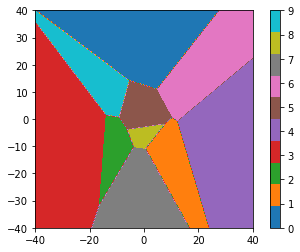

In [25]:
plt.imshow(y_grid.reshape(n_grid, n_grid).transpose(), 
           origin='lower', cmap='tab10',
           extent=[-40,40,-40,40])
plt.colorbar()
plt.show()

This map shows for each combination of 1st and 2nd principal component what the most likely label is. So you could given me any 8 by 8 pixel image now, I can calculate the linear transformation using the 2 principal components which returns two numbers that correspond to a point in the 2d plane. The color of that location indicates the most likely label according to logistic regression.

Of course, these predictions are not 100% accurate but only 61% accurate. Especially in the middle there is a lot of ambiguity and many images will likely be mis-classified.

Another point worth mentioning is that it was not guaranteed that each of the 10 possible classes appears in the color map. For example it might have happened that the number 8, say, is not the most likely class label for any combination of x and y value.